In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
churn_data = pd.read_csv('Customer-Churn-Records.csv')

In [116]:
churn_data.shape

(10000, 15)

In [54]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [55]:
churn_data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [56]:
# check Missing values
print(churn_data.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [27]:
churn_data.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [60]:
# Drop columns that are not relevant
churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Drop Exited column and store it in target variable
predictors = churn_data.drop(['Exited'], axis=1)
target = churn_data['Exited']

In [61]:

categorical_features = predictors.select_dtypes(include=['object']).columns.tolist()
onehot_encoder = OneHotEncoder()
transformer = ColumnTransformer(transformers=[
    ('categorical', onehot_encoder, categorical_features)
], remainder='passthrough')


numerical_features = predictors.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()


pipeline = Pipeline(steps=[('categorical', transformer),
                           ('scaler', scaler)])

predictors_preprocessed = pipeline.fit_transform(predictors[numerical_features + categorical_features])


In [88]:


X = predictors_preprocessed
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=815)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

X_val = torch.from_numpy(X_val.astype(np.float32))
y_val = torch.from_numpy(y_val.values.astype(np.float32))


Epoch 1, Train Loss: 0.5829141736030579, Val Loss: 0.5349574089050293
Epoch 2, Train Loss: 0.5365071892738342, Val Loss: 0.5006576776504517
Epoch 3, Train Loss: 0.5032114386558533, Val Loss: 0.4677748382091522
Epoch 4, Train Loss: 0.47162777185440063, Val Loss: 0.4445704221725464
Epoch 5, Train Loss: 0.4498159885406494, Val Loss: 0.43268516659736633
Epoch 6, Train Loss: 0.43921956419944763, Val Loss: 0.4290863275527954
Epoch 7, Train Loss: 0.4366651177406311, Val Loss: 0.42916345596313477
Epoch 8, Train Loss: 0.43746715784072876, Val Loss: 0.4288681149482727
Epoch 9, Train Loss: 0.4375486671924591, Val Loss: 0.42555156350135803
Epoch 10, Train Loss: 0.43426522612571716, Val Loss: 0.4180286228656769
Epoch 11, Train Loss: 0.42645594477653503, Val Loss: 0.40633758902549744
Epoch 12, Train Loss: 0.4141949415206909, Val Loss: 0.3914283812046051
Epoch 13, Train Loss: 0.39847803115844727, Val Loss: 0.37484070658683777
Epoch 14, Train Loss: 0.38090088963508606, Val Loss: 0.3583562672138214
Epo

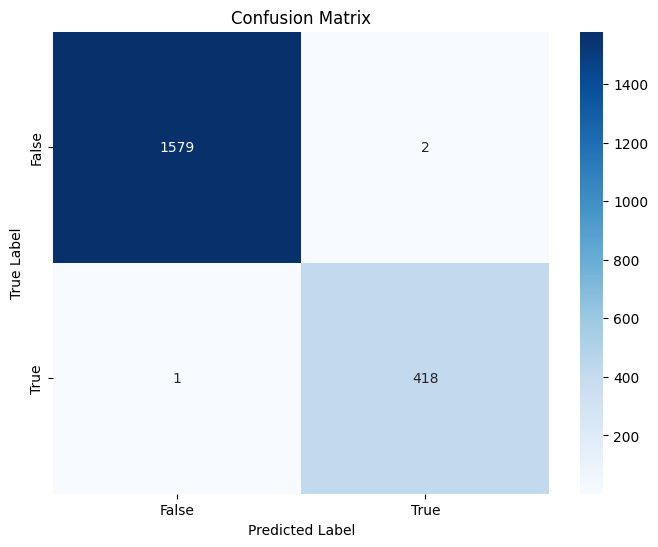

In [139]:
# Standard Model
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(hidden_size, output_size)
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.hidden.weight, mode='fan_in', nonlinearity='relu')
        nn.init.xavier_normal_(self.output.weight)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        # add dropout layer to prevent overfitting
        x = self.dropout(x)
        x = self.output(x)
        # Binary Classificaion, therefore Sigmoid function is used
        x = self.sigmoid(x)
        return x
    

input_size = 20  
hidden_size = 200   
output_size = 1  
dropout_rate = 0.2
model = FNN(input_size, hidden_size, output_size, dropout_rate)
# suitable for binary classification
loss_function = nn.BCELoss()
# generally used optimizer (momentum) and adding L2 regularization for preventing overfitting
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)


min_value_loss = float('inf')
patience = 5
counter = 0
num_epochs = 10000
for epoch in range(num_epochs):
    output = model(X_train)
    output = output.squeeze() 
    loss = loss_function(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_output = val_output.squeeze()  
        val_loss = loss_function(val_output, y_val)  

    if val_loss < min_value_loss:
        min_value_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print('Early stopping')
            break
    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    
predicted_values = []
true_values = []
correct = 0
total = 0
with torch.no_grad():
    output = model(X_test).squeeze()
    predicted = output > 0.5
    predicted_values.extend(predicted.numpy())
    true_values.extend(y_test.numpy())
    total = y_test.size(0)
    correct += (predicted == y_test).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(true_values, predicted_values)
recall = recall_score(true_values, predicted_values)
f1 = f1_score(true_values, predicted_values)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



cm = confusion_matrix(true_values, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




# Learning Rate Change

Epoch 1, Train Loss: 1.0344337224960327, Val Loss: 0.677054762840271
Epoch 2, Train Loss: 0.6829013824462891, Val Loss: 0.5642710328102112
Epoch 3, Train Loss: 0.5721738338470459, Val Loss: 0.6467658281326294
Epoch 4, Train Loss: 0.6576723456382751, Val Loss: 0.7066095471382141
Epoch 5, Train Loss: 0.7191399931907654, Val Loss: 0.6820257306098938
Epoch 6, Train Loss: 0.6942635178565979, Val Loss: 0.575295090675354
Epoch 7, Train Loss: 0.5854184627532959, Val Loss: 0.4202750027179718
Epoch 8, Train Loss: 0.42690685391426086, Val Loss: 0.29485008120536804
Epoch 9, Train Loss: 0.29773977398872375, Val Loss: 0.288120299577713
Epoch 10, Train Loss: 0.2885003089904785, Val Loss: 0.3441774249076843
Epoch 11, Train Loss: 0.3433031439781189, Val Loss: 0.3235703110694885
Epoch 12, Train Loss: 0.3219558298587799, Val Loss: 0.2278635948896408
Epoch 13, Train Loss: 0.2258470505475998, Val Loss: 0.15015192329883575
Epoch 14, Train Loss: 0.1480715572834015, Val Loss: 0.12376360595226288
Epoch 15, Tra

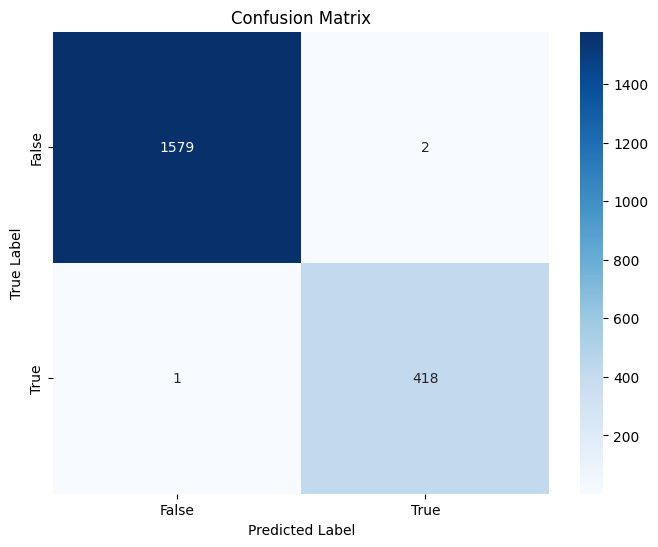

In [148]:
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(hidden_size, output_size)
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.hidden.weight, mode='fan_in', nonlinearity='relu')
        nn.init.xavier_normal_(self.output.weight)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        # add dropout layer to prevent overfitting
        x = self.dropout(x)
        x = self.output(x)
        # Binary Classificaion, therefore Sigmoid function is used
        x = self.sigmoid(x)
        return x
    

input_size = 20  
hidden_size = 200   
output_size = 1  
dropout_rate = 0.2
model = FNN(input_size, hidden_size, output_size, dropout_rate)
# suitable for binary classification
loss_function = nn.BCELoss()
# generally used optimizer (momentum) and adding L2 regularization for preventing overfitting
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=0.001)


min_value_loss = float('inf')
patience = 5
counter = 0
num_epochs = 10000
for epoch in range(num_epochs):
    output = model(X_train)
    output = output.squeeze() 
    loss = loss_function(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_output = val_output.squeeze()  
        val_loss = loss_function(val_output, y_val)  

    if val_loss < min_value_loss:
        min_value_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print('Early stopping')
            break
    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    
predicted_values = []
true_values = []
correct = 0
total = 0
with torch.no_grad():
    output = model(X_test).squeeze()
    predicted = output > 0.5
    predicted_values.extend(predicted.numpy())
    true_values.extend(y_test.numpy())
    total = y_test.size(0)
    correct += (predicted == y_test).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(true_values, predicted_values)
recall = recall_score(true_values, predicted_values)
f1 = f1_score(true_values, predicted_values)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



cm = confusion_matrix(true_values, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




# Increase model complexity by adding more layers

Epoch 1, Train Loss: 0.5491559505462646, Val Loss: 0.4999181628227234
Epoch 2, Train Loss: 0.5093815326690674, Val Loss: 0.4756016135215759
Epoch 3, Train Loss: 0.4852519929409027, Val Loss: 0.4566792845726013
Epoch 4, Train Loss: 0.46660059690475464, Val Loss: 0.4452020823955536
Epoch 5, Train Loss: 0.45533037185668945, Val Loss: 0.43685129284858704
Epoch 6, Train Loss: 0.44694462418556213, Val Loss: 0.42622557282447815
Epoch 7, Train Loss: 0.43597397208213806, Val Loss: 0.4101695120334625
Epoch 8, Train Loss: 0.41927409172058105, Val Loss: 0.38862866163253784
Epoch 9, Train Loss: 0.39680585265159607, Val Loss: 0.36404353380203247
Epoch 10, Train Loss: 0.3710830509662628, Val Loss: 0.34006577730178833
Epoch 11, Train Loss: 0.3458763360977173, Val Loss: 0.31974896788597107
Epoch 12, Train Loss: 0.32440221309661865, Val Loss: 0.30387261509895325
Epoch 13, Train Loss: 0.3075099587440491, Val Loss: 0.29064318537712097
Epoch 14, Train Loss: 0.2934562563896179, Val Loss: 0.2771465480327606


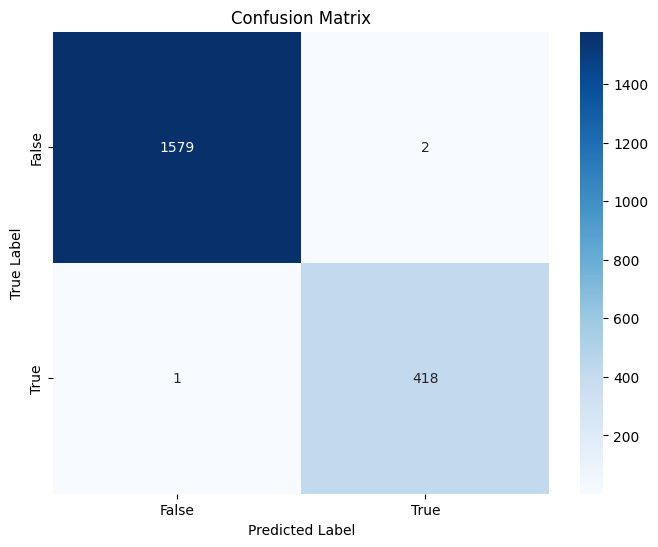

In [145]:
# More hidden layer
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(FNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size, hidden_size)  
        self.relu2 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        self.init_weights()
        
        
    def init_weights(self):
        nn.init.kaiming_normal_(self.hidden1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.hidden2.weight, mode='fan_in', nonlinearity='relu')

        nn.init.xavier_normal_(self.output.weight)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
        # add dropout layer to prevent overfitting
        x = self.dropout(x)
        x = self.output(x)
        # Binary Classificaion, therefore Sigmoid function is used
        x = self.sigmoid(x)
        return x


input_size = 20  
hidden_size = 200   
output_size = 1  
dropout_rate = 0.2
model = FNN(input_size, hidden_size, output_size, dropout_rate)
# suitable for binary classification
loss_function = nn.BCELoss()
# generally used optimizer (momentum) and adding L2 regularization for preventing overfitting
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)


min_value_loss = float('inf')

patience = 5
counter = 0
num_epochs = 1000
for epoch in range(num_epochs):
    output = model(X_train)
    output = output.squeeze() 
    loss = loss_function(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_output = val_output.squeeze()  
        val_loss = loss_function(val_output, y_val)  

    if val_loss < min_value_loss:
        min_value_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print('Early stopping')
            break
    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    
predicted_values = []
true_values = []
correct = 0
total = 0
with torch.no_grad():
    output = model(X_test).squeeze()
    predicted = output > 0.5
    predicted_values.extend(predicted.numpy())
    true_values.extend(y_test.numpy())
    total = y_test.size(0)
    correct += (predicted == y_test).sum().item()

print('Accuracy: {:.2f}%'.format(100 * correct / total))


accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}%')

precision = precision_score(true_values, predicted_values)
recall = recall_score(true_values, predicted_values)
f1 = f1_score(true_values, predicted_values)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



cm = confusion_matrix(true_values, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Change Activation Function to Leaky ReLu

Epoch 1, Train Loss: 0.7756115198135376, Val Loss: 0.7148521542549133
Epoch 2, Train Loss: 0.7205232977867126, Val Loss: 0.6560559868812561
Epoch 3, Train Loss: 0.6619250774383545, Val Loss: 0.6006969213485718
Epoch 4, Train Loss: 0.6067545413970947, Val Loss: 0.5634536147117615
Epoch 5, Train Loss: 0.5696576237678528, Val Loss: 0.5466418266296387
Epoch 6, Train Loss: 0.552940309047699, Val Loss: 0.5443952679634094
Epoch 7, Train Loss: 0.5507297515869141, Val Loss: 0.5487664341926575
Epoch 8, Train Loss: 0.5550670027732849, Val Loss: 0.553263247013092
Epoch 9, Train Loss: 0.5594514608383179, Val Loss: 0.5537782907485962
Epoch 10, Train Loss: 0.559772253036499, Val Loss: 0.5483126044273376
Epoch 11, Train Loss: 0.5540345311164856, Val Loss: 0.536442220211029
Epoch 12, Train Loss: 0.5418233871459961, Val Loss: 0.5188591480255127
Epoch 13, Train Loss: 0.5238467454910278, Val Loss: 0.49704089760780334
Epoch 14, Train Loss: 0.5016030073165894, Val Loss: 0.47298866510391235
Epoch 15, Train L

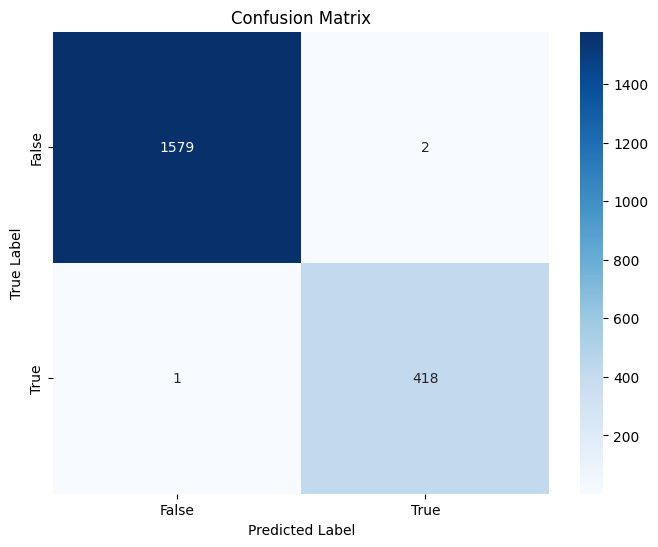

In [146]:
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(hidden_size, output_size)
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.hidden.weight, mode='fan_in', nonlinearity='relu')
        nn.init.xavier_normal_(self.output.weight)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.leaky_relu(x)
        # add dropout layer to prevent overfitting
        x = self.dropout(x)
        x = self.output(x)
        # Binary Classificaion, therefore Sigmoid function is used
        x = self.sigmoid(x)
        return x
    

input_size = 20  
hidden_size = 200   
output_size = 1  
dropout_rate = 0.2
model = FNN(input_size, hidden_size, output_size, dropout_rate)
# suitable for binary classification
loss_function = nn.BCELoss()
# generally used optimizer (momentum) and adding L2 regularization for preventing overfitting
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)


min_value_loss = float('inf')

patience = 5
counter = 0
num_epochs = 10000
for epoch in range(num_epochs):
    output = model(X_train)
    output = output.squeeze() 
    loss = loss_function(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_output = val_output.squeeze()  
        val_loss = loss_function(val_output, y_val)  

    if val_loss < min_value_loss:
        min_value_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print('Early stopping')
            break
    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    
predicted_values = []
true_values = []
correct = 0
total = 0
with torch.no_grad():
    output = model(X_test).squeeze()
    predicted = output > 0.5
    predicted_values.extend(predicted.numpy())
    true_values.extend(y_test.numpy())
    total = y_test.size(0)
    correct += (predicted == y_test).sum().item()

print('Accuracy: {:.2f}%'.format(100 * correct / total))


accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(true_values, predicted_values)
recall = recall_score(true_values, predicted_values)
f1 = f1_score(true_values, predicted_values)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



cm = confusion_matrix(true_values, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Change Optimizer

Epoch 1, Train Loss: 0.5814598202705383, Val Loss: 0.5423823595046997
Epoch 2, Train Loss: 0.5439296960830688, Val Loss: 0.5245152711868286
Epoch 3, Train Loss: 0.5263917446136475, Val Loss: 0.5093958377838135
Epoch 4, Train Loss: 0.511572003364563, Val Loss: 0.4966316521167755
Epoch 5, Train Loss: 0.49907034635543823, Val Loss: 0.48576685786247253
Epoch 6, Train Loss: 0.4884260296821594, Val Loss: 0.47634726762771606
Epoch 7, Train Loss: 0.4791794717311859, Val Loss: 0.4679722487926483
Epoch 8, Train Loss: 0.4709222912788391, Val Loss: 0.4603014886379242
Epoch 9, Train Loss: 0.4633164405822754, Val Loss: 0.4530628025531769
Epoch 10, Train Loss: 0.456101655960083, Val Loss: 0.446055144071579
Epoch 11, Train Loss: 0.4490794241428375, Val Loss: 0.4391419589519501
Epoch 12, Train Loss: 0.44211530685424805, Val Loss: 0.43223631381988525
Epoch 13, Train Loss: 0.4351261854171753, Val Loss: 0.4252912104129791
Epoch 14, Train Loss: 0.42806771397590637, Val Loss: 0.41829463839530945
Epoch 15, T

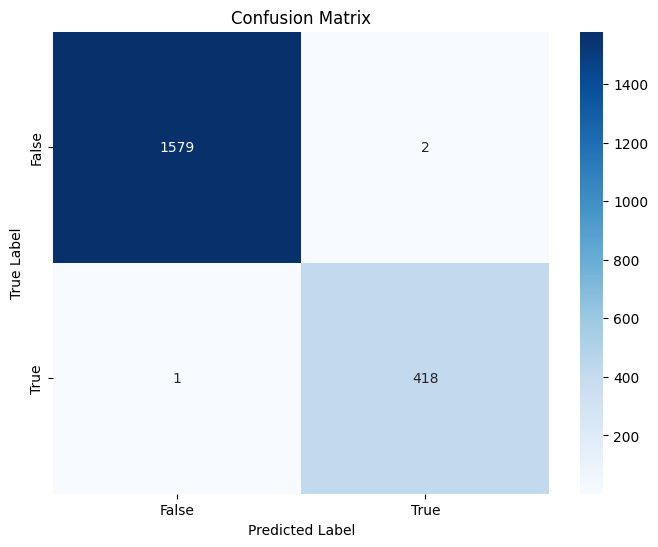

In [147]:


class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(hidden_size, output_size)
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.hidden.weight, mode='fan_in', nonlinearity='relu')
        nn.init.xavier_normal_(self.output.weight)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        # add dropout layer to prevent overfitting
        x = self.dropout(x)
        x = self.output(x)
        # Binary Classificaion, therefore Sigmoid function is used
        x = self.sigmoid(x)
        return x
    

input_size = 20  
hidden_size = 200   
output_size = 1  
dropout_rate = 0.2
model = FNN(input_size, hidden_size, output_size, dropout_rate)
# suitable for binary classification
loss_function = nn.BCELoss()
# generally used optimizer (momentum) and adding L2 regularization for preventing overfitting
optimizer = optim.Adam(model.parameters(), lr=0.001)

min_value_loss = float('inf')

patience = 10
counter = 0
num_epochs = 10000
for epoch in range(num_epochs):
    output = model(X_train)
    output = output.squeeze() 
    loss = loss_function(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_output = val_output.squeeze()  
        val_loss = loss_function(val_output, y_val)  

    if val_loss < min_value_loss:
        min_value_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print('Early stopping')
            break
    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    
predicted_values = []
true_values = []
correct = 0
total = 0
with torch.no_grad():
    output = model(X_test).squeeze()
    predicted = output > 0.5
    predicted_values.extend(predicted.numpy())
    true_values.extend(y_test.numpy())
    total = y_test.size(0)
    correct += (predicted == y_test).sum().item()

print('Accuracy: {:.2f}%'.format(100 * correct / total))


accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(true_values, predicted_values)
recall = recall_score(true_values, predicted_values)
f1 = f1_score(true_values, predicted_values)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



cm = confusion_matrix(true_values, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
